In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import tensorflow as tf
from PIL import Image
import cv2
from io import BytesIO
from collections import Counter
from google.colab import files
import IPython.display as display
from tensorflow import keras
from keras.models import load_model

In [3]:
def cv2_to_pil(img_cv2):
    img_cv2 = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
    image_pillow = Image.fromarray(img_cv2)
    return image_pillow


def pil_to_cv2(img_pil):
    tmp = cv2.cvtColor(np.array(img_pil), cv2.COLOR_RGB2BGR)
    return tmp


In [5]:
def load_model_2():
    # Загрузка модели TensorFlow с Google Диска
    model = tf.saved_model.load('/content/drive/My Drive/saved_model_6')
    return model

In [6]:
def crop_img(img):
    tmp = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    height, width, chans = tmp.shape
    image = tmp
    # Получение размеров изображения
    height, width = image.shape[:2]

    # Определение размера центральной части
    center_x, center_y = height // 2,  width// 2

    crop_size_x = (height // 224 - 0) * 224
    crop_size_y = (width // 224 - 0) * 224
    crop_size_x = 224 if crop_size_x <= 0 else crop_size_x
    crop_size_y = 224 if crop_size_y <= 0 else crop_size_y

    # Определение координат для обрезки
    x1, y1 = center_x - crop_size_x // 2, center_y - crop_size_y // 2
    x2, y2 = center_x + crop_size_x // 2, center_y + crop_size_y // 2

    # Вырезание центральной части изображения
    cropped_image = image[y1:y2, x1:x2]
    print(center_x, center_y)
    print(crop_size_x, crop_size_y)
    print(x1, y1, x2, y2)
    return cropped_image


In [7]:
def slice_image(image_PIL, chunk_size):
    image = image_PIL
    width, height = image.size
    tmp_set = []
    for x in range(0, width, chunk_size):
        for y in range(0, height, chunk_size):
            box = (x, y, x + chunk_size, y + chunk_size)
            region = image.crop(box)
            # region.save(f'chunk_{x}_{y}.png')
            tmp_set.append(region)
    return tmp_set

In [8]:
chunk_size = 224
tmp = []
classes = ['Amarant', 'Cabbage', 'Watercress']


In [9]:
def read_and_preprocess_image(image):
    img = image
    # img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return tf.convert_to_tensor(img_array, dtype=tf.float32)

In [10]:
def load_image():
  uploaded = files.upload()

# Открытие и отображение изображения
  for fn in uploaded.keys():
    img_path = '/content/' + fn
    img = Image.open(BytesIO(uploaded[fn]))
    display.display(img)
  return img

In [11]:

def use_model(model, tensor):
    #infer = model.signatures['serving_default']
    input_data = tensor
    output = model(input_data)
    return output

def predict(img):
    model = load_model_2() #keras.models.load_model('/content/drive/My Drive/model/proj_v4.h5')
    images = slice_image(cv2_to_pil(crop_img(img)), 224)
    predictions = []
    for img1 in images:
        image = read_and_preprocess_image(img1)
        pred = use_model(model, image)
        print(pred)
        predictions.append(np.argmax(pred))
    print(predictions)
    counter = Counter(predictions)
    print(counter)
    print(counter.most_common(1))
    print(counter.most_common(1)[0])
    print(counter.most_common(1)[0][0])
    most_common_element = counter.most_common(1)[0][0]
    predictions.clear()
    print(predictions)
    return most_common_element


Saving photo_2024-06-14_12-10-29.jpg to photo_2024-06-14_12-10-29.jpg


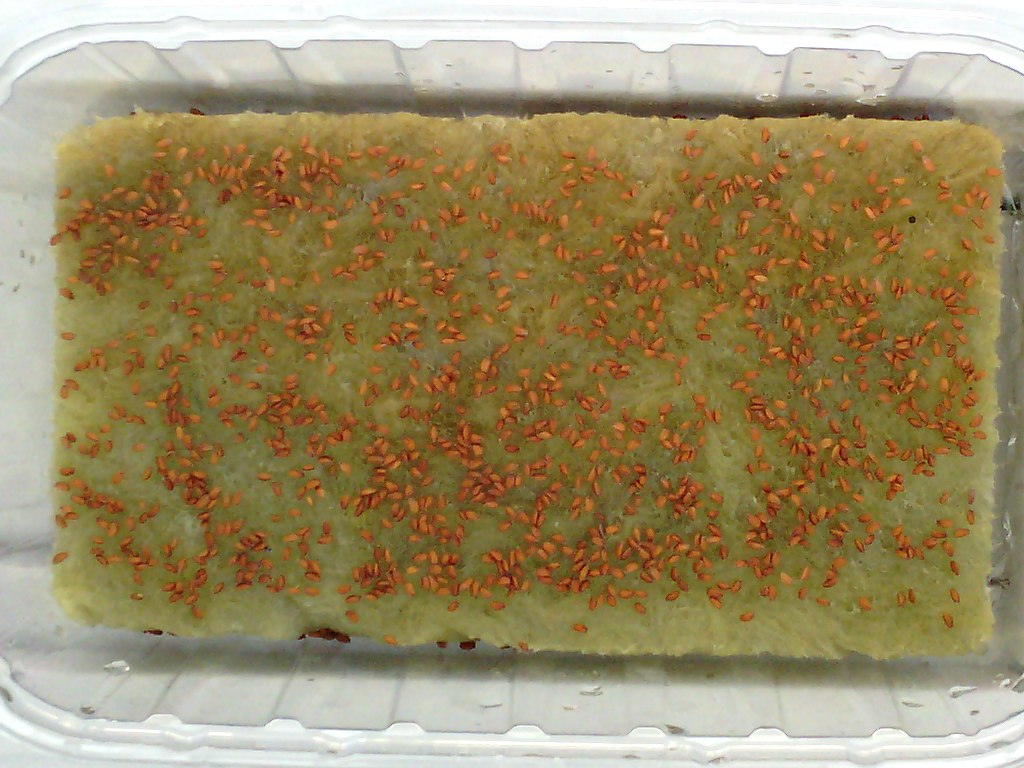

2
384 512
672 896
48 64 720 960
tf.Tensor([[2.9750145e-05 1.1841099e-06 9.9996901e-01]], shape=(1, 3), dtype=float32)
tf.Tensor([[5.8392461e-06 1.3098656e-05 9.9998105e-01]], shape=(1, 3), dtype=float32)
tf.Tensor([[6.9437506e-10 3.4982200e-08 1.0000000e+00]], shape=(1, 3), dtype=float32)
tf.Tensor([[6.6567793e-07 1.2754259e-01 8.7245673e-01]], shape=(1, 3), dtype=float32)
tf.Tensor([[3.8813952e-09 5.1221325e-09 1.0000000e+00]], shape=(1, 3), dtype=float32)
tf.Tensor([[7.9282358e-08 1.7883798e-06 9.9999809e-01]], shape=(1, 3), dtype=float32)
tf.Tensor([[1.8245854e-11 4.5352881e-11 1.0000000e+00]], shape=(1, 3), dtype=float32)
tf.Tensor([[9.5367557e-07 3.8663742e-01 6.1336160e-01]], shape=(1, 3), dtype=float32)
tf.Tensor([[1.6008969e-06 6.5856209e-14 9.9999845e-01]], shape=(1, 3), dtype=float32)
tf.Tensor([[3.452265e-08 8.303886e-08 9.999999e-01]], shape=(1, 3), dtype=float32)
tf.Tensor([[1.0998964e-09 7.5489520e-10 1.0000000e+00]], shape=(1, 3), dtype=float32)
tf.Tensor([[9.7440602e-07

In [12]:
img = load_image()
print(classes[(predict(img))])